Problem Statement

This project predicts the price of a flight ticket based on factors such as airline, source and destination cities, departure and arrival times, duration, number of stops, and travel class (Economy or Business). The goal is to help travelers and airlines understand pricing patterns, optimize bookings, and make informed decisions.

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('data/flight.csv',index_col=0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [8]:
df.nunique()

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

In [9]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Exploring data

In [12]:
print("Categories in 'airline' variable ",end=" ")
print(df['airline'].unique())

print("Categories in 'source_city' variable ",end=" ")
print(df['source_city'].unique())

print("Categories in 'departure_time' variable ",end=" ")
print(df['departure_time'].unique())

print("Categories in 'stops' variable ",end=" ")
print(df['stops'].unique())

print("Categories in 'arrival_time' variable ",end=" ")
print(df['arrival_time'].unique())

print("Categories in 'destination_city' variable ",end=" ")
print(df['destination_city'].unique())

print("Categories in 'class' variable ",end=" ")
print(df['class'].unique())


Categories in 'airline' variable  ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Categories in 'source_city' variable  ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Categories in 'departure_time' variable  ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Categories in 'stops' variable  ['zero' 'one' 'two_or_more']
Categories in 'arrival_time' variable  ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
Categories in 'destination_city' variable  ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Categories in 'class' variable  ['Economy' 'Business']


In [13]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print(f"We have {len(numeric_features)} numeric features : {numeric_features}")
print(f"We have {len(categorical_features)} categorical features : {categorical_features}")

We have 3 numeric features : ['duration', 'days_left', 'price']
We have 8 categorical features : ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [14]:
route_avg=df.groupby(['source_city','destination_city'])['price'].transform('mean')
df['price_vs_route_avg']=df['price']/route_avg
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,price_vs_route_avg
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0.307556
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0.307556
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0.307711
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0.307659
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0.307659


In [15]:
print(f"Cheapest flights: {df['price'].min()}")
print(f"Most expensive flights: {df['price'].max()}")

Cheapest flights: 1105
Most expensive flights: 123071


<Axes: xlabel='price', ylabel='Count'>

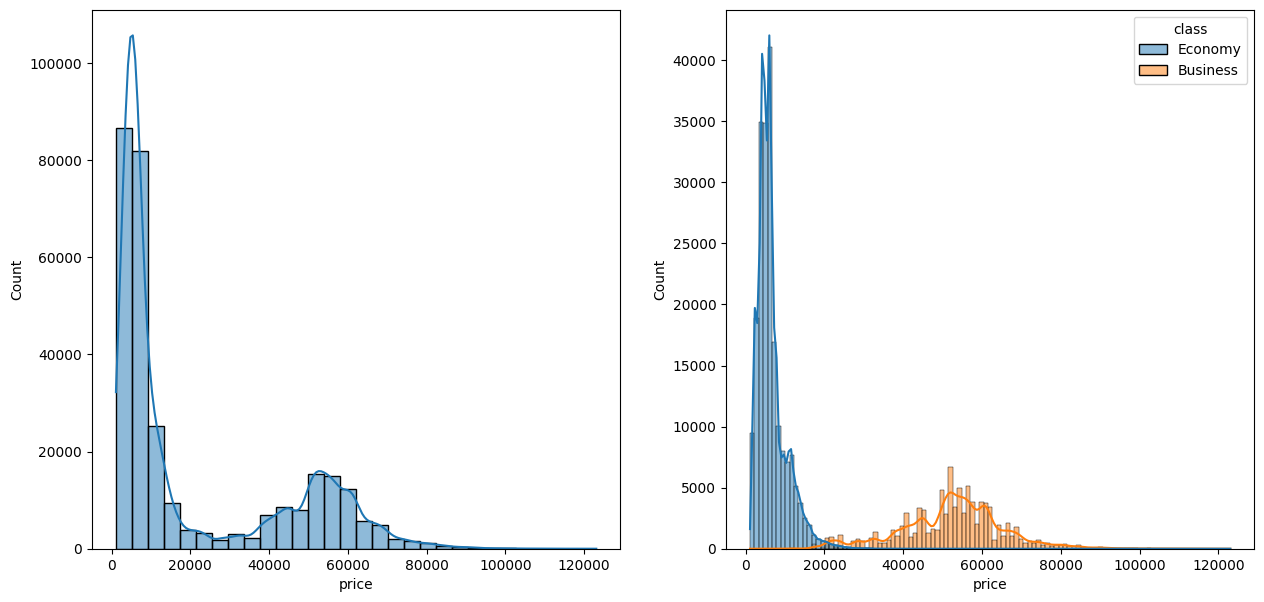

In [22]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='price',kde=True,bins=30)
plt.subplot(1,2,2)
sns.histplot(data=df,x='price',hue='class',kde=True)

<Axes: ylabel='price'>

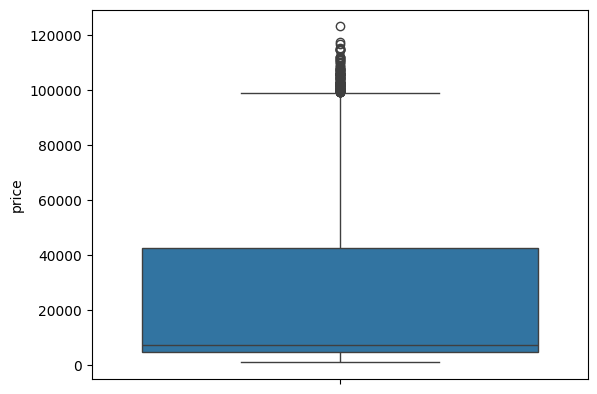

In [23]:
sns.boxplot(data=df, y='price')

<Axes: xlabel='stops', ylabel='price'>

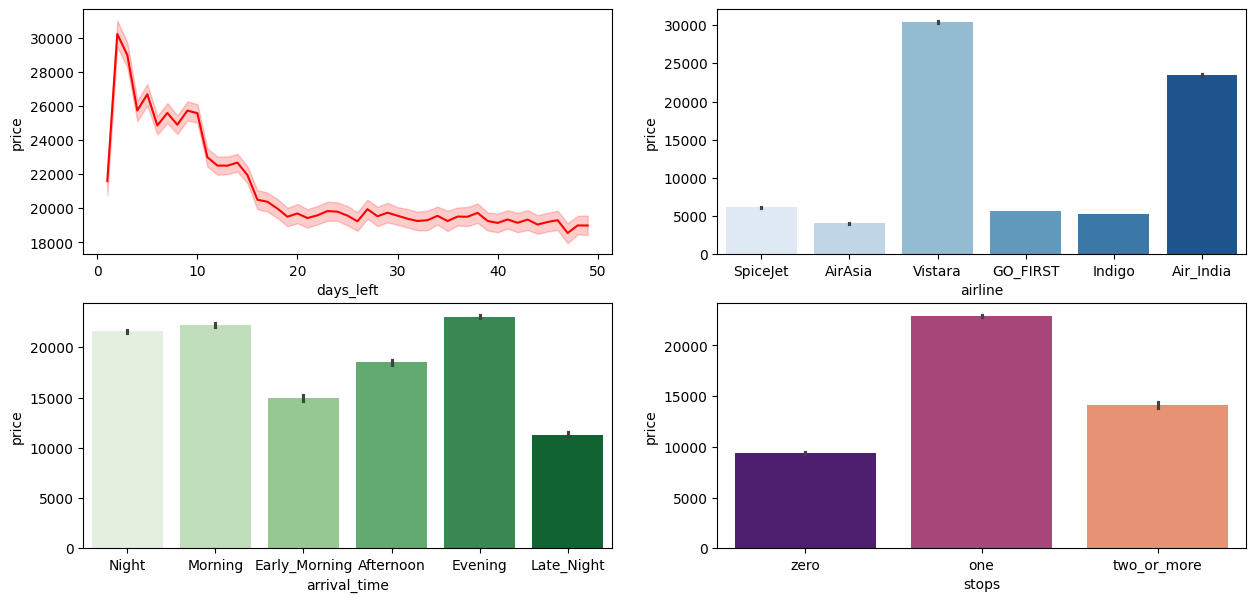

In [34]:
fig,axs=plt.subplots(2,2,figsize=(15,7))
plt.subplot(2,2,1)
sns.lineplot(data=df,x='days_left',y='price',color='red')
plt.subplot(2,2,2)
sns.barplot(data=df,x='airline',y='price',palette = 'Blues')
plt.subplot(2,2,3)
sns.barplot(data=df,x='arrival_time',y='price',palette='Greens')
plt.subplot(2,2,4)
sns.barplot(data=df,x='stops',y='price',palette='magma')

<Axes: ylabel='duration'>

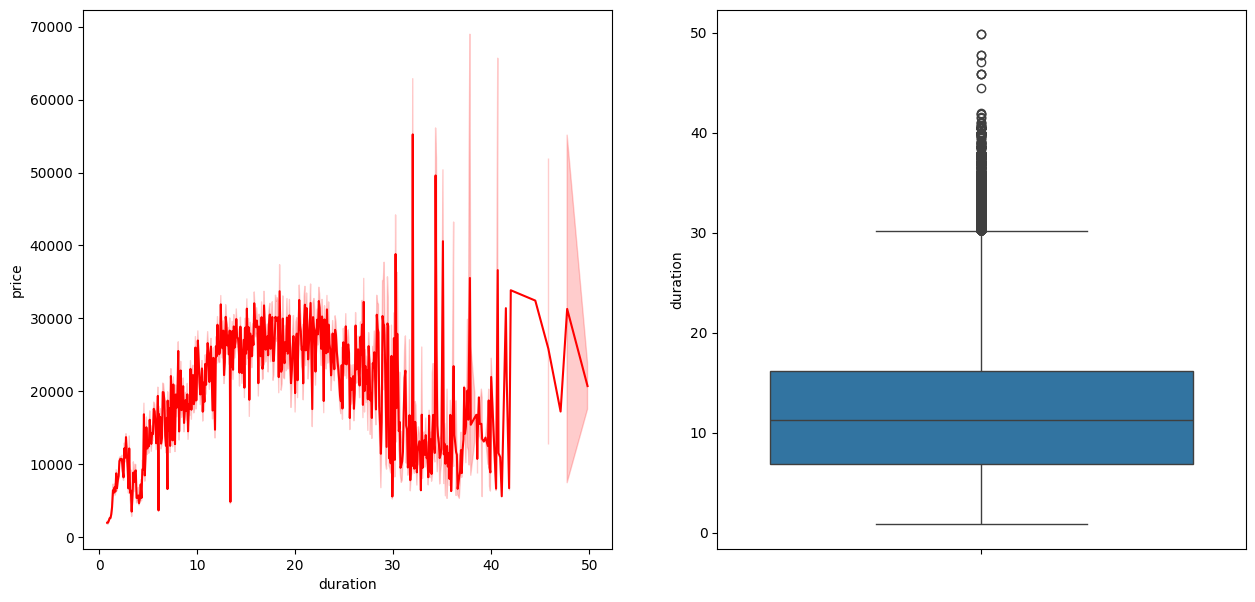

In [38]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.lineplot(data=df,x='duration',y='price',color='red')
plt.subplot(1,2,2)
sns.boxplot(data=df, y='duration')

<Axes: >

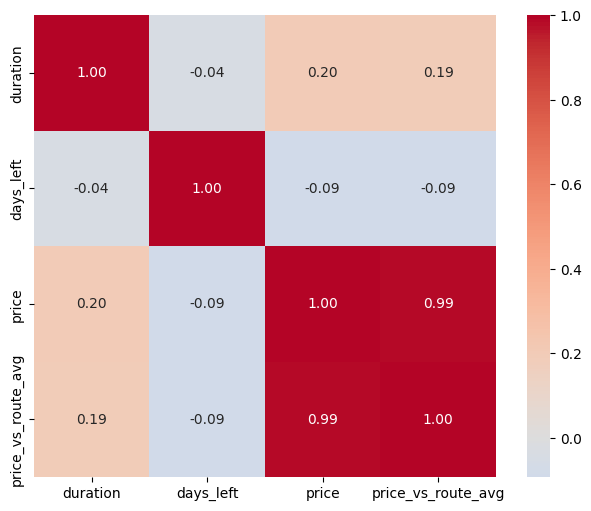

In [39]:
numeric_features = ['duration', 'days_left', 'price', 'price_vs_route_avg']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)

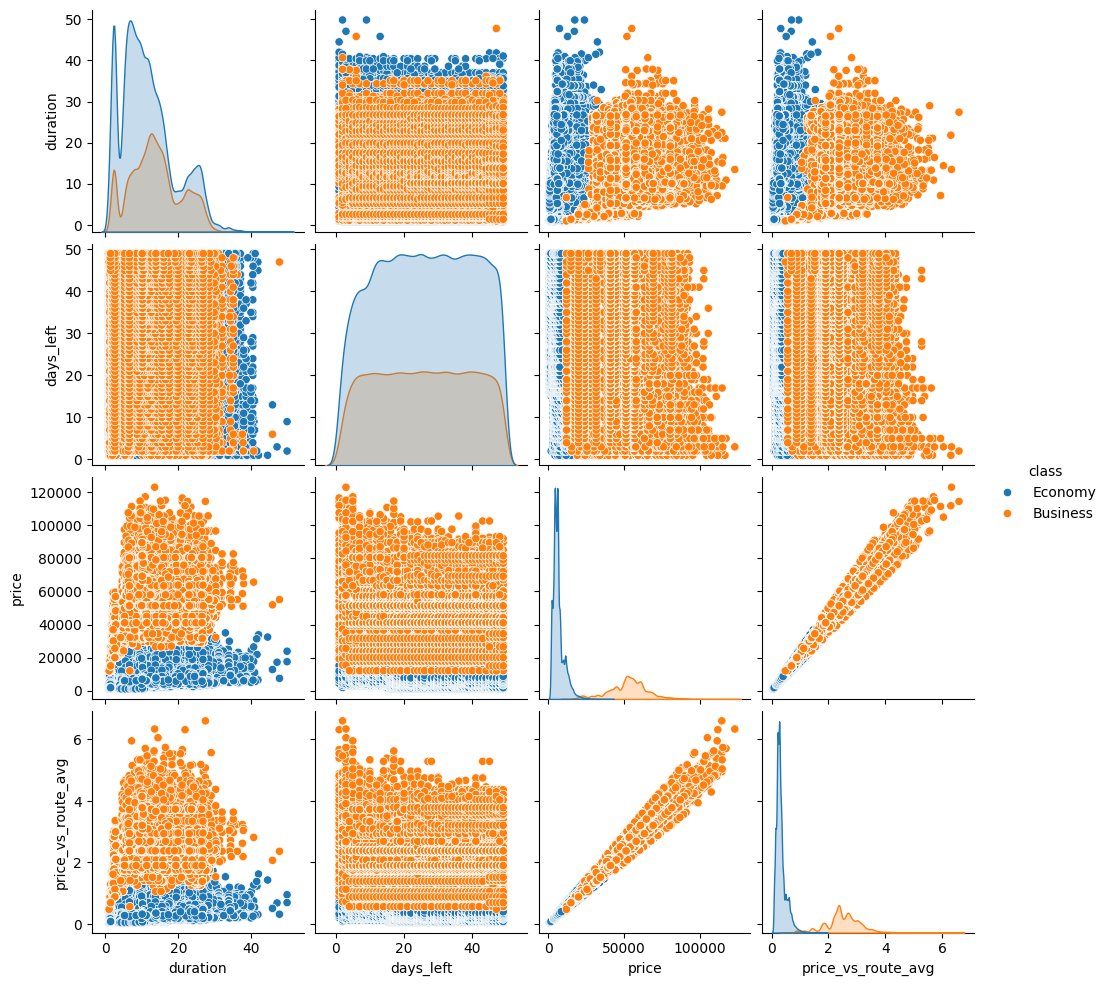

In [40]:
sns.pairplot(df,hue = 'class')